In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import ast

In [ ]:
count_analysis = '/content/drive/MyDrive/MACSS60000/FINAL_DATA/sentiment_score.csv'
df = pd.read_csv(path)

In [ ]:
path = '/content/drive/MyDrive/MACSS60000/FINAL_DATA/sentiment_score.csv'
df = pd.read_csv(path)

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,title,selftext,created_utc,score,all_comments,contains_relational_word,reply_count,pandemic_period,comment_body,group,sentiment_probabilities,predicted_rating,normalized_sentiment
0,0,0,Is my degree worth it?,"I know for a fact I want to be a teacher, pref...",2020-04-29 06:16:47,1.0,{'body': 'Welcome to /r/teaching. Please remem...,1.0,3.0,1.0,Welcome to /r/teaching. Please remember the ru...,0.0,"[0.02434772, 0.01911189, 0.05400144, 0.2829052...",5.0,1.000000
1,1,0,Is my degree worth it?,"I know for a fact I want to be a teacher, pref...",2020-04-29 06:16:47,1.0,"{'body': ""It depends on the licensing requirem...",1.0,3.0,1.0,It depends on the licensing requirements for y...,0.0,"[0.03279613, 0.21216513, 0.53603506, 0.1824882...",3.0,0.000000
2,2,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,"{'body': 'Are you on a curriculum map?', 'scor...",0.0,10.0,0.0,Are you on a curriculum map?,0.0,"[0.18765633, 0.20995575, 0.26447347, 0.1931614...",3.0,-0.051301
3,3,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,{'body': 'I love this question and am interest...,0.0,10.0,0.0,I love this question and am interested in what...,0.0,"[0.00962509, 0.03723098, 0.11756698, 0.5209406...",4.0,0.500000
4,4,1,Real-world lesson plans? Could it be successfu...,Hello! This is my first time posting so sorry ...,2018-06-14 19:35:55,5.0,"{'body': ""So what they taught us in our progra...",0.0,10.0,0.0,So what they taught us in our program is that ...,0.0,"[0.03146419, 0.16652903, 0.48224553, 0.2634071...",3.0,0.073329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304570,1307380,196383,I’m done,"My mother is an emotionally abusive alcoholic,...",2018-06-24 05:20:48,8.0,"{'body': 'Please talk to me. Please ', 'score'...",1.0,2.0,0.0,Please talk to me. Please,1.0,"[0.3575319, 0.18719873, 0.21378897, 0.1104412,...",1.0,-0.264871
1304571,1307381,196383,I’m done,"My mother is an emotionally abusive alcoholic,...",2018-06-24 05:20:48,8.0,"{'body': ""Hey, I am very very sorry about your...",1.0,2.0,0.0,"Hey, I am very very sorry about your loss. \n\...",1.0,"[0.20178245, 0.4846244, 0.28397304, 0.02434278...",2.0,-0.426646
1304572,1307382,196384,So lonely and cold.,Noone wants me. Noone loves me. Just had a one...,2018-01-16 04:20:03,7.0,{'body': 'Who said you that no one wants or li...,0.0,1.0,0.0,Who said you that no one wants or likes you? I...,1.0,"[0.33286303, 0.35798684, 0.19917673, 0.0721474...",2.0,-0.437957
1304573,1307383,196385,[Serious] Just a thought. Please read.,"someone told me that life never gets easier,we...",2020-01-13 15:53:11,5.0,"{'body': '""there\'s no point in dying"" i agree...",1.0,2.0,1.0,"""there's no point in dying"" i agree with but i...",1.0,"[0.29986766, 0.32515144, 0.20038864, 0.1177597...",2.0,-0.346731


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(0)
groups = ['0.0', '1.0']
data = {
    'normalized_sentiment': np.random.randn(300),
    'group': np.random.choice(groups, 300)
}

df = pd.DataFrame(data)

print(df.head())
print(df.describe())
print(df['group'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_sentiment'], kde=True)
plt.title('Normalized Sentiment Distribution')
plt.xlabel('Normalized Sentiment')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='normalized_sentiment', data=df)
plt.title('Normalized Sentiment Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Normalized Sentiment')
plt.show()

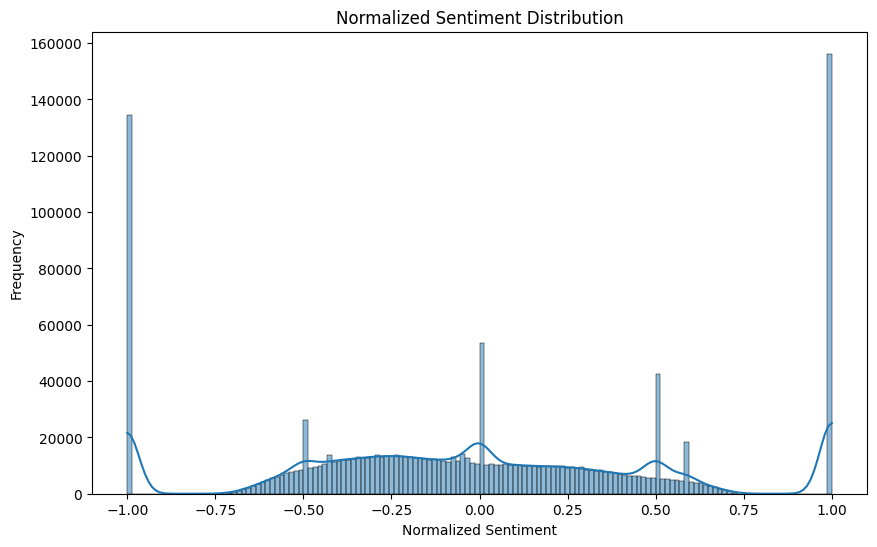

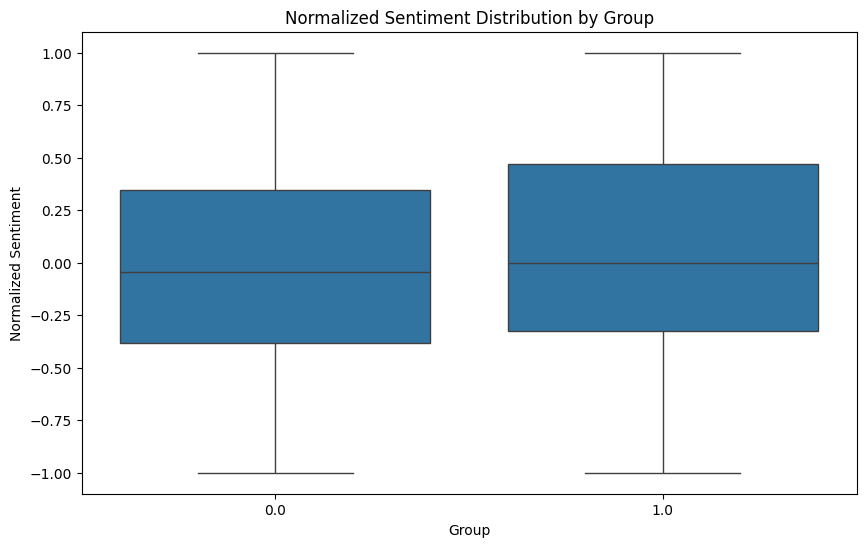

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_sentiment'], kde=True)
plt.title('Normalized Sentiment Distribution')
plt.xlabel('Normalized Sentiment')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='normalized_sentiment', data=df)
plt.title('Normalized Sentiment Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Normalized Sentiment')
plt.show()

<Figure size 1000x600 with 0 Axes>

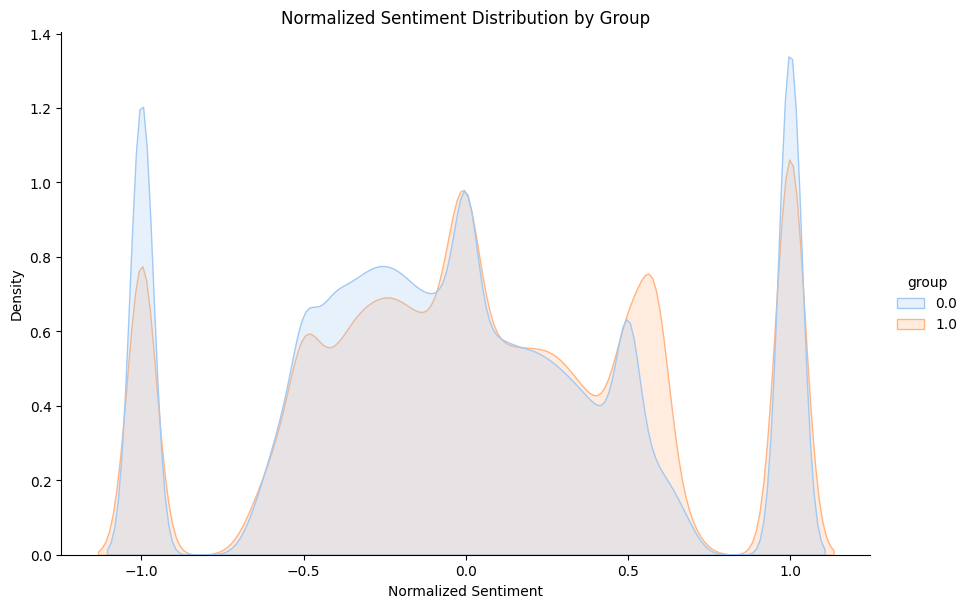

<Figure size 1000x600 with 0 Axes>

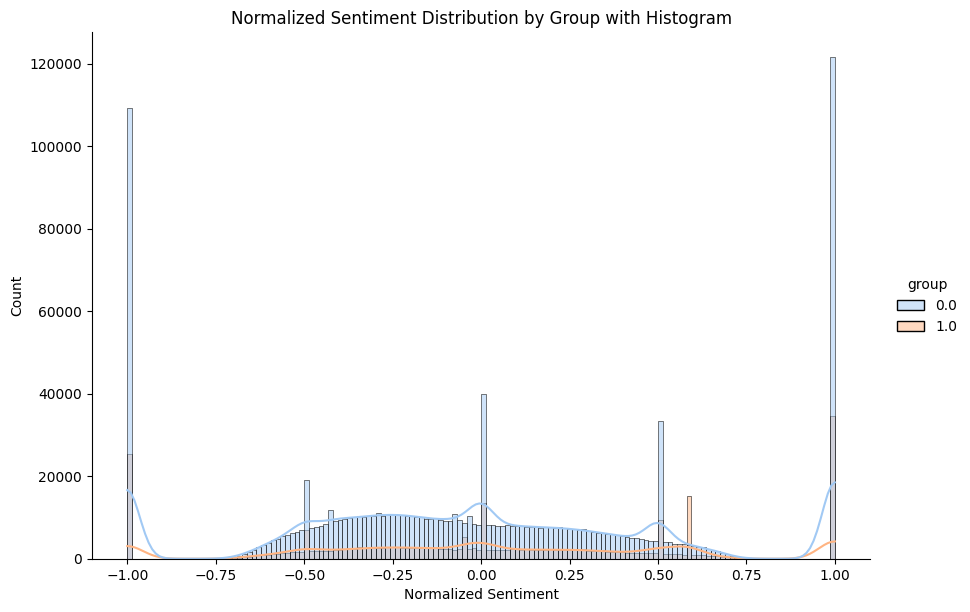

In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(df, x='normalized_sentiment', hue='group', kind='kde', fill=True, common_norm=False, palette='pastel', height=6, aspect=1.5)
plt.title('Normalized Sentiment Distribution by Group')
plt.xlabel('Normalized Sentiment')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.displot(df, x='normalized_sentiment', hue='group', kind='hist', kde=True, fill=True, common_norm=False, palette='pastel', height=6, aspect=1.5)
plt.title('Normalized Sentiment Distribution by Group with Histogram')
plt.xlabel('Normalized Sentiment')
plt.ylabel('Count')
plt.show()

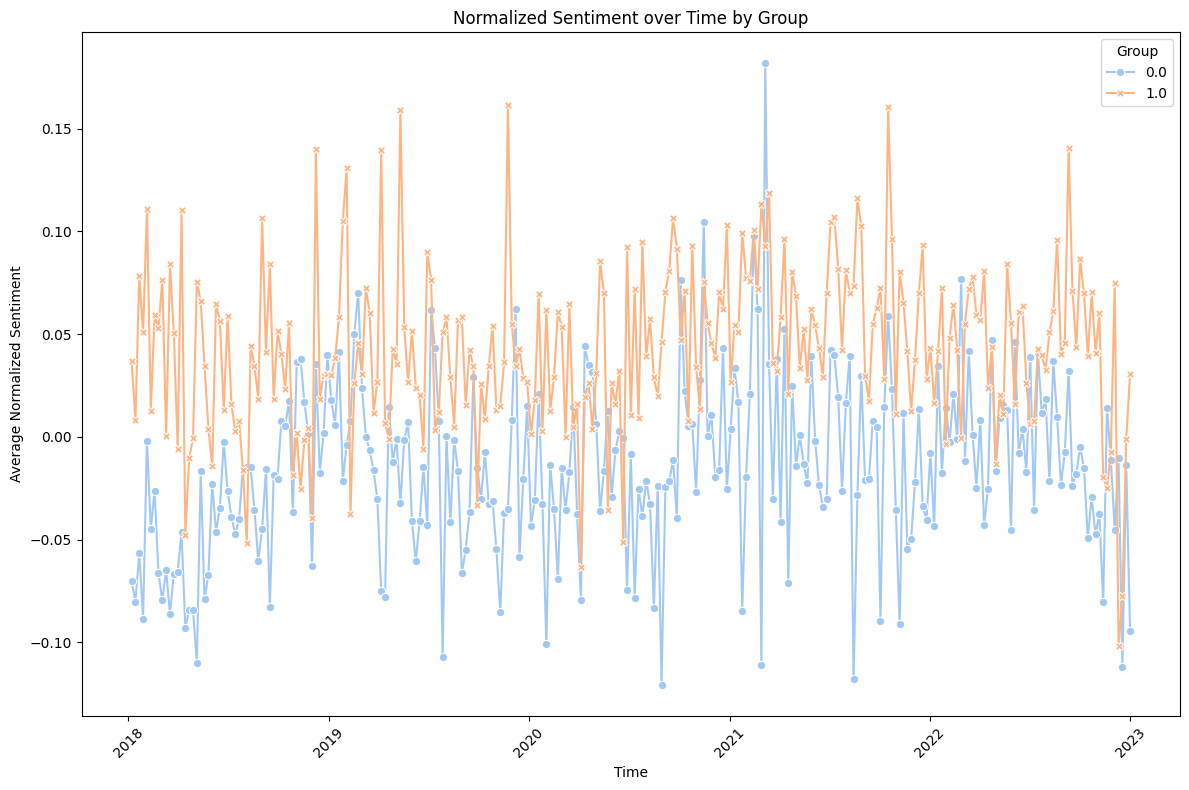

In [ ]:
df['created_utc'] = pd.to_datetime(df['created_utc'])

df.set_index('created_utc', inplace=True)

grouped = df.groupby('group').resample('W')['normalized_sentiment'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped, x='created_utc', y='normalized_sentiment', hue='group', palette='pastel', style='group', markers=True, dashes=False)
plt.title('Normalized Sentiment over Time by Group')
plt.xlabel('Time')
plt.ylabel('Average Normalized Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

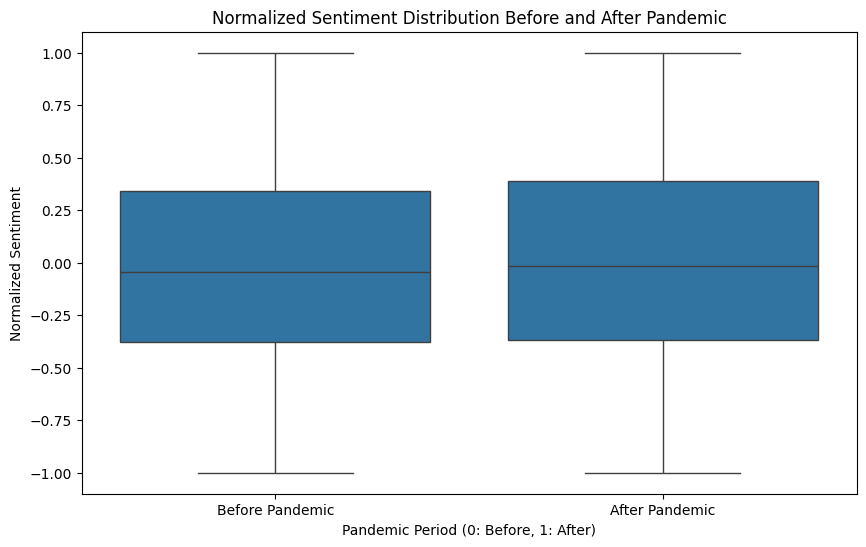

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pandemic_period', y='normalized_sentiment', data=df)
plt.title('Normalized Sentiment Distribution Before and After Pandemic')
plt.xlabel('Pandemic Period (0: Before, 1: After)')
plt.ylabel('Normalized Sentiment')
plt.xticks([0, 1], ['Before Pandemic', 'After Pandemic'])
plt.show()

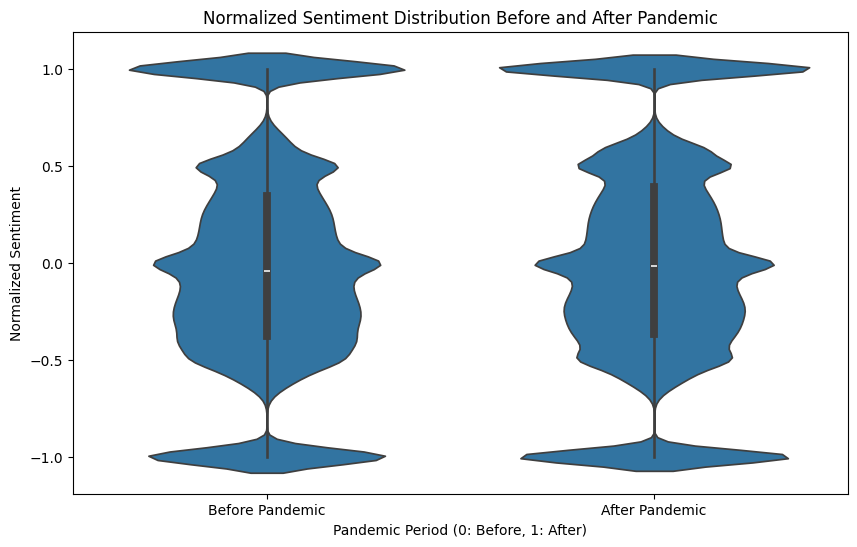

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='pandemic_period', y='normalized_sentiment', data=df)
plt.title('Normalized Sentiment Distribution Before and After Pandemic')
plt.xlabel('Pandemic Period (0: Before, 1: After)')
plt.ylabel('Normalized Sentiment')
plt.xticks([0, 1], ['Before Pandemic', 'After Pandemic'])
plt.show()

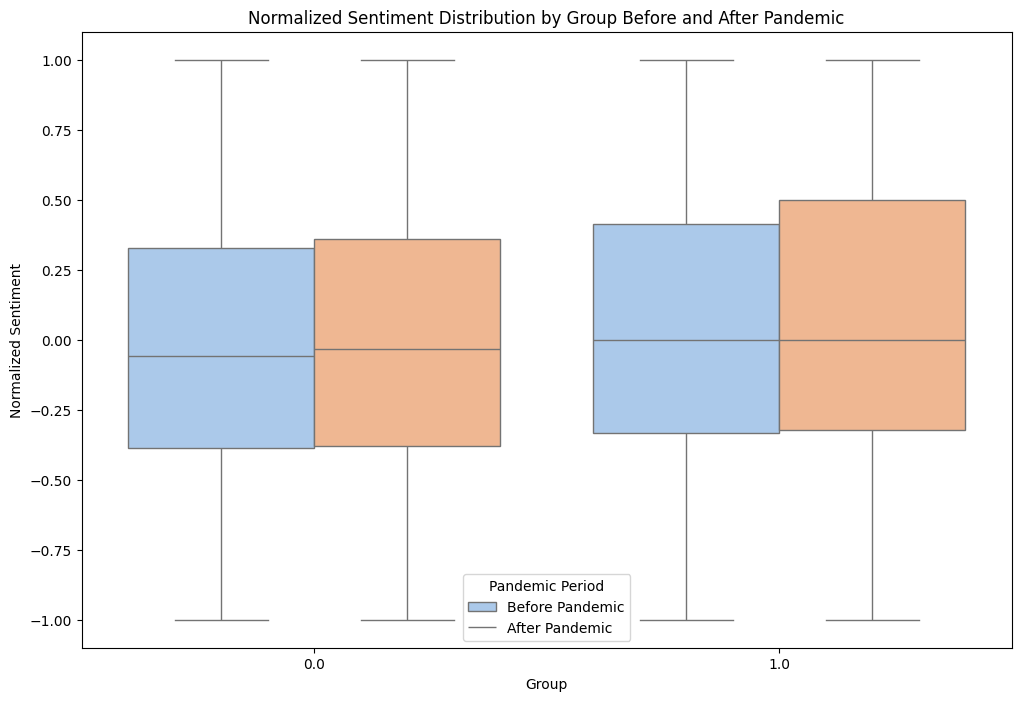

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='group', y='normalized_sentiment', hue='pandemic_period', data=df, palette='pastel')
plt.title('Normalized Sentiment Distribution by Group Before and After Pandemic')
plt.xlabel('Group')
plt.ylabel('Normalized Sentiment')
plt.legend(title='Pandemic Period', labels=['Before Pandemic', 'After Pandemic'])
plt.show()